In [2]:
# Loading Packages

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn

%matplotlib inline

In [3]:
# load and format data

with open(r'C:\Users\User\Downloads\BuyAffinity_Train.txt', 'r') as fp:
    data = fp.read()
    print('No. of records: ', len(data.split('\n')))

data_lines = data.split('\n')
headers = data_lines[0].split('\t')
data = [d.split('\t') for d in data_lines[1:]]

No. of records:  101181


In [4]:
# Create dataframe

df = pd.DataFrame(data=data, columns=np.array(headers))
df = df.set_index('Index')
df.head()

,F1,F2,F3,F4,F5,F6,F7,F8,F9,F10,...,F14,F15,F16,F17,F18,F19,F20,F21,F22,C
Index,,,,,,,,,,,,,,,,,,,,,
1,0.224505886,0.500339823,0.489860281,0.902412719,7934,-6970,-5714,9982,-5697,4227810299,...,-3433637453,10/4/1986,9/6/1992,2,1,706,305,1,2,0
2,0.321128312,0.281118753,0.907282976,0.772158566,-8238,1219,1663,1287,-3658,-1146724819,...,609277486,2/24/1979,1/5/1983,1,1,423,206,18,7,1
3,0.893440767,0.622005443,0.998775822,0.098386253,8540,5266,-9377,-3504,-4511,5947184989,...,-8977995005,1/12/1989,11/22/1986,2,1,703,315,1,4,0
4,0.320640946,0.957234037,0.346000222,0.646478689,-7772,-383,9681,-8661,3474,-5724795826,...,4868760308,2/18/1982,6/10/1992,1,1,122,304,15,1,0
5,0.475961263,0.623008485,0.544988288,0.159708695,1571,-8039,-7961,-2385,4407,-3097637172,...,9757408267,4/10/1987,10/19/1985,1,1,486,240,1,1,0


In [5]:
# Change data types of columns

df[['F1', 'F2', 'F3', 'F4', 'C']] = df[['F1', 'F2', 'F3', 'F4', 'C']].apply(pd.to_numeric)
df[['F15', 'F16']] = df[['F15', 'F16']].apply(pd.to_datetime)
for col in ['F5', 'F6', 'F7', 'F8', 'F9', 'F10', 'F11', 'F12', 'F13', 'F14', 'F17', 'F18', 'F19', 'F20', 'F21', 'F22']:
    df[col] = df[col].astype(np.int64)

df.insert(loc=len(df.columns)-1, column='Date flag', value= (df['F16'] - df['F15']).dt.days)

X = df[['F1', 'F2', 'F3', 'F4', 'F5', 'F6', 'F7', 'F8', 'F9', 'F10', 'F11', 'F12', 'F13', 'F14', 'F17', 'F18', 'F19', 'F20', 'F21', 'F22', 'Date flag']]
Y = df['C']

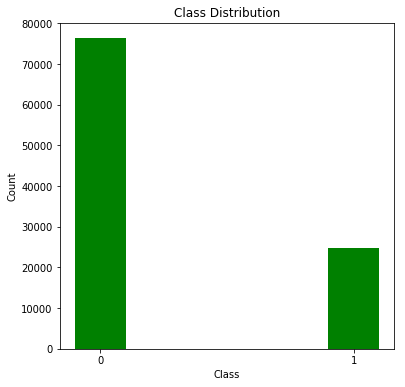

In [6]:
# Class (0/1) Distribution Analysis

counts = df.groupby(['C'])['C'].count().tolist()
classes = ['0', '1']
fig = plt.figure(figsize = (6, 6)) 
  
# creating the bar plot 
plt.bar(classes, counts, color ='green', width = 0.2) 
  
plt.xlabel("Class") 
plt.ylabel("Count") 
plt.title("Class Distribution") 
plt.show()

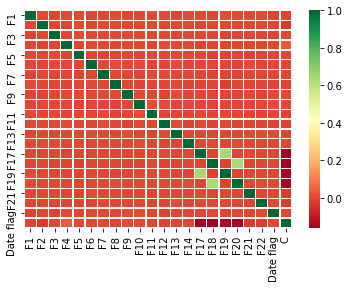

In [7]:
# correlation check
import seaborn as sns

cor_matrix = df.corr()
sns.heatmap(cor_matrix, fmt="", cmap="RdYlGn", linewidths=0.30)

In [8]:
# Multicollinearity check

from statsmodels.stats.outliers_influence import variance_inflation_factor

df_ = X
while(True):
    vif = [variance_inflation_factor(df_.values, i) for i in range(df_.shape[1])]
    vif_df = pd.DataFrame(vif, index = df_.columns, columns = ['VIF Score'])
    max_vif_score = vif_df['VIF Score'].max()
    max_vif_index = vif_df['VIF Score'].argmax()
    if max_vif_score > 5:
        print('column :', max_vif_index, ', VIF_Score : ', max_vif_score)
        df_.drop([max_vif_index], axis=1, inplace=True)
        #drop columns from X also
        #X.drop([max_vif_index], axis=1, inplace=True)
    else:
        break

C:\Users\User\AppData\Roaming\Python\Python36\site-packages\ipykernel_launcher.py:10: FutureWarning: 
The current behaviour of 'Series.argmax' is deprecated, use 'idxmax'
instead.
The behavior of 'argmax' will be corrected to return the positional
maximum in the future. For now, use 'series.values.argmax' or
'np.argmax(np.array(values))' to get the position of the maximum
row.
  # Remove the CWD from sys.path while we load stuff.
C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\frame.py:3940: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


column : F20 , VIF_Score :  6.146726297808645
column : F19 , VIF_Score :  6.136440986851926


C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\figure.py:2369: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


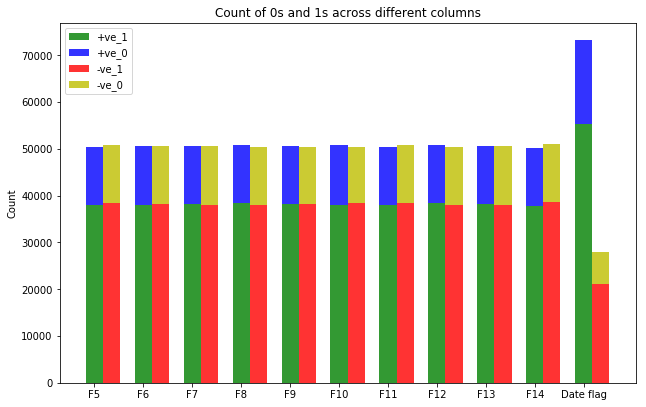

In [9]:
# Class Distribution across +ve and -ve vlaues of numerical columns
pos_1_count = []
pos_0_count = []
neg_1_count = []
neg_0_count = []
cols = ['F5', 'F6', 'F7', 'F8', 'F9', 'F10', 'F11', 'F12', 'F13', 'F14', 'Date flag']
index = np.arange(len(cols))

for col in cols:
    pos_dict = df[df[col] > 0].groupby(['C'])[col].count().to_dict()
    neg_dict = df[df[col] <= 0].groupby(['C'])[col].count().to_dict()
    pos_1_count.append(pos_dict[1])
    pos_0_count.append(pos_dict[0])
    neg_1_count.append(neg_dict[1])
    neg_0_count.append(neg_dict[0])
    #print(col, ' > 0 :', pos_dict, col, ' <= 0 :', neg_dict)

# shared y plot
width = 0.35
fig = plt.figure(figsize =(8, 5))
ax = fig.add_axes([0,0,1,1])

ax.bar(index, pos_0_count, width, color='g', alpha= 0.8)
ax.bar(index, pos_1_count, width, bottom=pos_0_count, color='b', alpha= 0.8)
ax.bar(index + width, neg_0_count, width, color='r', alpha= 0.8)
ax.bar(index + width, neg_1_count, width, bottom=neg_0_count, color='y', alpha= 0.8)
ax.set_ylabel('Count')
ax.set_title('Count of 0s and 1s across different columns')
plt.xticks(index + width//2, tuple(cols))
ax.legend(labels=['+ve_1', '+ve_0', '-ve_1', '-ve_0'])
plt.tight_layout()
plt.show()

In [10]:
# Analysing possible buckets in columns 'F5', 'F6', 'F7', 'F8', 'F9', 'F10', 'F11', 'F12', 'F13', 'F14'  and class distribution
# in these columns, where 1 represents +ve, 0 represents -ve value in column.

# Below function is to show multiple table outputs side by side
from IPython.display import display_html
def display_side_by_side(*args):
    html_str=''
    for df in args:
        html_str+=df.to_html()
    display_html(html_str.replace('table','table style="display:inline"'),raw=True)

X_sub = df[['F5', 'F6', 'F7', 'F8', 'F9', 'F10', 'F11', 'F12', 'F13', 'F14', 'C']]
X_sub['dummy'] = np.ones((len(X),))
for col in X_sub.columns:
    X_sub[col] = np.where(X_sub[col] > 0 , 1, 0)

# 1st Dict
F5_F9_dict = X_sub.groupby(['F5', 'F6', 'F7', 'F8', 'F9'])[['dummy', 'C']].sum().to_dict()
df_F5_F9 = pd.DataFrame.from_dict(list(F5_F9_dict.values())[0], orient= 'index', columns= [['Count_F5-F9']])
df_F5_F9['C=1_count'] = list(list(F5_F9_dict.values())[1].values())

# 2nd Dict
F10_F14_dict = X_sub.groupby(['F10', 'F11', 'F12', 'F13', 'F14'])[['dummy', 'C']].sum().to_dict()
df_F10_F14 = pd.DataFrame.from_dict(list(F10_F14_dict.values())[0], orient= 'index', columns= [['Count_F10-F14']])
df_F10_F14['C=1_count'] = list(list(F10_F14_dict.values())[1].values())

# 3rd Dict
F5_F14_dict = X_sub.groupby(['F5', 'F6', 'F7', 'F8', 'F9', 'F10', 'F11', 'F12', 'F13', 'F14'])[['dummy', 'C']].sum().to_dict()
df_F5_F14 = pd.DataFrame.from_dict(list(F5_F14_dict.values())[0], orient= 'index', columns= [['Count_F5-F14']])
df_F5_F14['C=1_count'] = list(list(F5_F14_dict.values())[1].values())

# Display Data Frames side by side
display_side_by_side(df_F5_F9, df_F10_F14, df_F5_F14)

C:\Users\User\AppData\Roaming\Python\Python36\site-packages\ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  del sys.path[0]
C:\Users\User\AppData\Roaming\Python\Python36\site-packages\ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


,Count_F5-F9,C=1_count
"(0, 0, 0, 0, 0)",3174,792
"(0, 0, 0, 0, 1)",3156,790
"(0, 0, 0, 1, 0)",3190,781
"(0, 0, 0, 1, 1)",3163,782
"(0, 0, 1, 0, 0)",3142,753
"(0, 0, 1, 0, 1)",3175,815
"(0, 0, 1, 1, 0)",3264,778
"(0, 0, 1, 1, 1)",3185,763
"(0, 1, 0, 0, 0)",3170,770
"(0, 1, 0, 0, 1)",3183,779


In [11]:
# standardisation and preprocessing

def standardize(col):
    mu = col.mean()
    sigma = col.std()
    col_std = []
    for x in col:
        x = (x - mu) / sigma
        col_std.append(x)
        
    return np.array(col_std)

def normalize(col):
    xmin = col.min()
    xmax = col.max()
    col_std = []
    for x in col:
        x = (x - xmin) / (xmax - xmin)
        col_std.append(x)
        
    return np.array(col_std)

X_std = X[['F1', 'F2', 'F3', 'F4', 'F17', 'F18', 'F21', 'F22', 'Date flag']]
for col in ['F5', 'F6', 'F7', 'F8', 'F9', 'F10', 'F11', 'F12', 'F13', 'F14', 'F17', 'F18', 'F21', 'F22', 'Date flag']:
    X_std[col] = standardize(X[col])

X_std.head()

C:\Users\User\AppData\Roaming\Python\Python36\site-packages\ipykernel_launcher.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


,F1,F2,F3,F4,F17,F18,F21,F22,Date flag,F5,F6,F7,F8,F9,F10,F11,F12,F13,F14
Index,,,,,,,,,,,,,,,,,,,
1,0.224506,0.500340,0.489860,0.902413,0.738657,-0.379662,-0.751315,-0.544032,0.585224,1.377374,-1.202691,-0.992430,1.723310,-0.988897,0.729601,-0.676856,0.053584,1.065483,-0.584823
2,0.321128,0.281119,0.907283,0.772159,-0.379830,-0.379662,2.808395,0.502761,0.173763,-1.419664,0.210035,0.287059,0.219714,-0.635579,-0.202012,-1.181849,0.237660,-1.562695,0.114358
3,0.893441,0.622005,0.998776,0.098386,0.738657,-0.379662,-0.751315,-0.125315,-1.024553,1.482185,0.908204,-1.627752,-0.608776,-0.783387,1.027634,1.191916,-1.720243,-0.971429,-1.543663
4,0.320641,0.957234,0.346000,0.646479,-0.379830,-0.379662,2.180211,-0.753391,1.460055,-1.339067,-0.066334,1.677725,-1.500558,0.600255,-0.995568,-1.039442,1.133694,-0.813658,0.850992
5,0.475961,0.623008,0.544988,0.159709,-0.379830,-0.379662,-0.751315,-0.753391,-0.891225,0.276857,-1.387110,-1.382157,-0.415271,0.761925,-0.540180,-1.686882,0.130309,1.723519,1.696434


In [12]:
from sklearn.decomposition import PCA

pca = PCA(n_components=1)
pc_F1_F4 = pca.fit_transform(X_std[['F1', 'F2', 'F3', 'F4']])
pc_F5_F9 = pca.fit_transform(X_std[['F5', 'F6', 'F7', 'F8', 'F9']])
pc_F10_F14 = pca.fit_transform(X_std[['F10', 'F11', 'F12', 'F13', 'F14']])

X_pca = X_std[['F17', 'F18', 'F21', 'F22', 'Date flag']]
X_pca['pc F1-F4'] = pc_F1_F4
X_pca['pc1 F5-F9'] = pc_F5_F9[:,0]
X_pca['pc1 F10-F14'] = pc_F10_F14[:,0]

X_pca.head()

C:\Users\User\AppData\Roaming\Python\Python36\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
C:\Users\User\AppData\Roaming\Python\Python36\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # Remove the CWD from sys.path while we load stuff.
C:\Users\User\AppData\Roaming\Python\Python36\site-packages\ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer

,F17,F18,F21,F22,Date flag,pc F1-F4,pc1 F5-F9,pc1 F10-F14
Index,,,,,,,,
1,0.738657,-0.379662,-0.751315,-0.544032,0.585224,0.255069,0.213391,-0.347151
2,-0.379830,-0.379662,2.808395,0.502761,0.173763,0.148352,0.042781,0.720774
3,0.738657,-0.379662,-0.751315,-0.125315,-1.024553,-0.589550,0.639405,-0.653714
4,-0.379830,-0.379662,2.180211,-0.753391,1.460055,-0.154561,0.249806,0.763140
5,-0.379830,-0.379662,-0.751315,-0.753391,-0.891225,-0.251125,1.196588,1.573317


In [13]:
from sklearn.utils import resample

df_minority = df[df['C'] == 1]
df_majority = df[df['C'] == 0]

df_minority_upsampled = resample(df_minority, replace=True, n_samples=76000, random_state=123)
 
# Combine majority class with upsampled minority class
df_upsampled = pd.concat([df_majority, df_minority_upsampled])
y_upsampled = df_upsampled['C']
for col in ['F15', 'F16', 'F19', 'F20', 'C']:
    df_upsampled.drop(col, axis=1, inplace= True)
df_upsampled.head()

,F1,F2,F3,F4,F5,F6,F7,F8,F9,F10,F11,F12,F13,F14,F17,F18,F21,F22,Date flag
Index,,,,,,,,,,,,,,,,,,,
1,0.224506,0.500340,0.489860,0.902413,7934,-6970,-5714,9982,-5697,4227810299,-3918676258,316195953,6176861823,-3433637453,2,1,1,2,2164
3,0.893441,0.622005,0.998776,0.098386,8540,5266,-9377,-3504,-4511,5947184989,6881163164,-9921889287,-5610051842,-8977995005,2,1,1,4,-782
4,0.320641,0.957234,0.346000,0.646479,-7772,-383,9681,-8661,3474,-5724795826,-6014104498,6550322883,-4697085930,4868760308,1,1,15,1,3765
5,0.475961,0.623008,0.544988,0.159709,1571,-8039,-7961,-2385,4407,-3097637172,-9755731483,759031103,9984692447,9757408267,1,1,1,1,-538
6,0.922726,0.600115,0.616261,0.339285,-6554,8770,1065,-9720,5801,6730646544,7583286896,6027284059,5986948546,-6662571037,4,1,6,5,2766


In [14]:
# logistic regression model

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split

X_train, X_val, Y_train, Y_val = train_test_split(df_upsampled,y_upsampled,test_size=0.2,random_state=0)
lr = LogisticRegression(C= 100, solver= 'lbfgs', multi_class= 'ovr')
lr.fit(X_train, Y_train)

cutoff = 0.5 # predicted prob above 0.5 will be categorised as 1
pred_prob = lr.predict(X_val)
pred_class = [1 if x > cutoff else 0 for x in pred_prob]
cm = confusion_matrix(Y_val, pred_class)
print('Valid Confusion matrix :', '\n', cm)
print('\n', 'train Accuracy :', round(lr.score(X_train, Y_train)*100, 2), '\n', 'val Accuracy :', round(lr.score(X_val, Y_val)*100, 2))

Valid Confusion matrix : 
 [[7645 7507]
 [7687 7632]]

 train Accuracy : 50.53 
 val Accuracy : 50.14


In [15]:
# Random Forest Classifier

import pandas as pd
from sklearn.ensemble._forest import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel

rf_model = RandomForestClassifier(n_estimators = 100, criterion = 'entropy', random_state = 0)
rf_model.fit(X_train, Y_train)

RandomForestClassifier(criterion='entropy', random_state=0)

In [16]:
# prediction of Random Forest Classifier
y_pred_train = rf_model.predict(X_train)
cm_mat = confusion_matrix(Y_train, y_pred_train)
print('Train Confusion matrix :', '\n', cm_mat)
print('Train Accuracy :', round(rf_model.score(X_train, Y_train)*100, 2))

Train Confusion matrix : 
 [[61201     0]
 [    0 60681]]
Train Accuracy : 100.0


In [17]:
# prediction of Random Forest Classifier
y_pred_val = rf_model.predict(X_val)
cm_mat = confusion_matrix(Y_val, y_pred_val)
print('Valid Confusion matrix :', '\n', cm_mat)
print('Valid Accuracy :', round(rf_model.score(X_val, Y_val)*100, 2))

Valid Confusion matrix : 
 [[13557  1595]
 [ 1052 14267]]
Valid Accuracy : 91.31


In [ ]:
# SVM classifier
from sklearn.svm import SVC

classifier = SVC(kernel = 'linear', C = 0.1)
classifier.fit(X_train, Y_train)

In [ ]:
y_pred = classifier.predict(X_val)

In [ ]:
confusion_matrix(Y_val, y_pred)

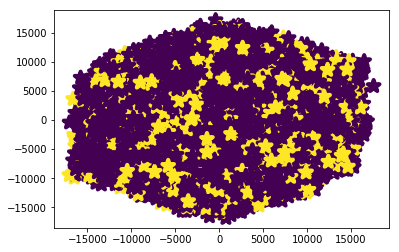

In [18]:
pca = PCA(n_components=2)
pc_all = pca.fit_transform(X[['F5', 'F6', 'F7', 'F8', 'F9']])
X_all = pd.DataFrame()
X_all['C'] = Y.to_list()
X_all['pc1'] = pc_all[:,0]
X_all['pc2'] = pc_all[:,1]

x = X_all['pc1'].to_list()
y = X_all['pc2'].to_list()
colors = X_all['C'].to_list()

plt.scatter(x, y, marker='*', s=150, linewidths=4, c=colors)
plt.show()

In [19]:
def test_data_prep(filepath):
    
    # load and format data
    with open(filepath, 'r') as fp:
        data = fp.read()
        print('No. of records: ', len(data.split('\n')))

    data_lines = data.split('\n')
    headers = data_lines[0].split('\t')
    data = [d.split('\t') for d in data_lines[1:]]
    
    # Create dataframe
    df = pd.DataFrame(data=data, columns=np.array(headers))
    df = df.set_index('Index')
    df.head()
    
    # Change data types of columns
    df[['F1', 'F2', 'F3', 'F4']] = df[['F1', 'F2', 'F3', 'F4']].apply(pd.to_numeric)
    df[['F15', 'F16']] = df[['F15', 'F16']].apply(pd.to_datetime)
    for col in ['F5', 'F6', 'F7', 'F8', 'F9', 'F10', 'F11', 'F12', 'F13', 'F14', 'F17', 'F18', 'F19', 'F20', 'F21', 'F22']:
        df[col] = df[col].astype(np.int64)

    df.insert(loc=len(df.columns)-1, column='Date flag', value= (df['F16'] - df['F15']).dt.days)

    x = df[['F1', 'F2', 'F3', 'F4', 'F5', 'F6', 'F7', 'F8', 'F9', 'F10', 'F11', 'F12', 'F13', 'F14', 'F17', 'F18', 'F19', 'F20', 'F21', 'F22', 'Date flag']]
    
    # Drop columns with high multicollinearity
    x.drop(['F19'], axis=1, inplace=True)
    x.drop(['F20'], axis=1, inplace=True)
    
    return x

X_test = test_data_prep(r'C:\Users\User\Downloads\BuyAffinity_Test.txt')
X_test_std = X_test[['F1', 'F2', 'F3', 'F4', 'F17', 'F18', 'F21', 'F22', 'Date flag']]
for col in ['F5', 'F6', 'F7', 'F8', 'F9', 'F10', 'F11', 'F12', 'F13', 'F14', 'F17', 'F18', 'F21', 'F22', 'Date flag']:
    X_test_std[col] = standardize(X_test[col])
    

No. of records:  19914


C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\frame.py:3940: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)
C:\Users\User\AppData\Roaming\Python\Python36\site-packages\ipykernel_launcher.py:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [20]:
# predicting on test data
y_pred_test = rf_model.predict(X_test)
results_df = pd.DataFrame()
results_df['Index'] = X_test.index
results_df['prediction'] = y_pred_test
results_df = results_df.set_index('Index')

In [21]:
sum(y_pred_test)

2590